In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<ipython-input-51-6e566b4d767a>:18: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(1 - 2*x)))


Text(0.5, 1.0, 'Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')

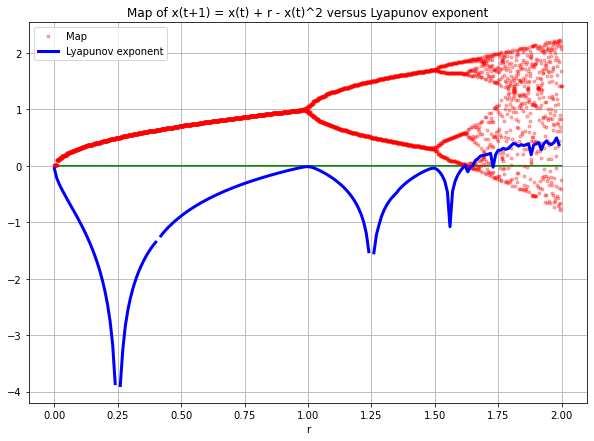

In [51]:
#This is some code stolen from http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html

result = []
lambdas = []
maps = []

# define range of r 
rvalues = np.arange(0, 2, 0.01)

# loop through r
for r in rvalues:
    x = 0.1
    result = []
    # iterate system 100 times
    for t in range(100):
        x = x + r - x**2
        # calculate log of the absolute of the derivative
        result.append(np.log(abs(1 - 2*x)))
    # take average
    lambdas.append(np.mean(result))
    # for the map ignore first 100 iterations as transient time and iterate anew
    for t in range(20):
        x = x + r - x**2
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(0, 2, 4000)
# zero line
zero = [0]*4000
ax1.plot(xticks, zero, 'g-')
# plot map
ax1.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
ax1.set_xlabel('r')
# plot lyapunov
ax1.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')

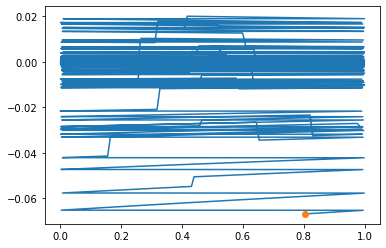

[0.8031809  0.81117699 0.81917508 ... 0.48620716 0.49620205 0.50619694]


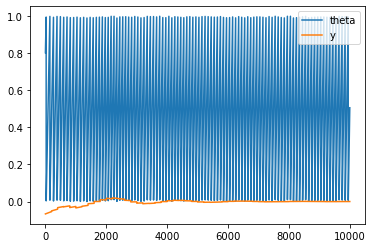

In [55]:
def H(theta):
    return np.sin(2*np.pi*theta)

#random initialziation
theta_0 = np.random.uniform(0,1)
y_0 = np.random.uniform(-0.1, 0.1)

#pick parameters
sigma = 3.0#0.2 #shear
lam = 0.1 #damping
A = 1.#0.1 #kick amplitude
T = 2 #time interval of kicks
dt = 0.01 #time step size
n_steps = 10000 #number of timesteps

theta = np.zeros(n_steps+1)
y = np.zeros(n_steps+1)
theta[0] = theta_0
y[0] = y_0


for i in range(n_steps):
    theta[i+1] = (theta[i] + (1 + sigma*y[i])*dt) % 1
    if (i+1)*dt % T == 0: #if you have kick
        y[i+1] = y[i] + (-lam*y[i] + A*H(theta[i]))*dt
    else: #no kick
        y[i+1] = y[i] + (-lam*y[i])*dt
    
plt.plot(theta, y)
plt.plot(theta_0, y_0, "o", linewidth = 4)
plt.show()

plt.figure()
plt.plot(theta, label = "theta")
plt.plot(y, label = "y")
plt.legend()
print(theta)